<a href="https://colab.research.google.com/github/PedroH-07/Checkpoint1-SERS/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd

In [152]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';')

/tmp/ipython-input-4025975215.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/household_power_consumption.txt", sep=';')


# **01 - Carregue o dataset e exibe as 10 primeiras linhas**

In [153]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **02 diferença entre Global_active_power e Global_reactive_power**

Global_active_power: Esta coluna representa a potência ativa total consumida pela residência em quilowatts (kW). A potência ativa é a potência real que realiza trabalho útil, como acender lâmpadas, fazer funcionar motores, etc. É a energia que você realmente "usa" e pela qual paga na sua conta de eletricidade.

Global_reactive_power: Esta coluna representa a potência reativa total consumida pela residência em quilovolt-ampère reativo (kVAr). A potência reativa é a potência que não realiza trabalho útil diretamente, mas é necessária para criar campos magnéticos em equipamentos como motores, transformadores e reatores. Ela não é convertida em trabalho, mas é necessária para que a potência ativa possa ser entregue.

## **03 Verifique se tem valores ausentes e quantifique-os**

In [154]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


# **04 Converta a coluna Date para o tipo datetime e cria uma nova coluna com o dia da semana correspondente**

In [155]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


# **05 Filtre os registros apenas do ano 2007 e calcule a média de consumo diário de Gblobal_active_power**

In [156]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]

daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


# **06. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**



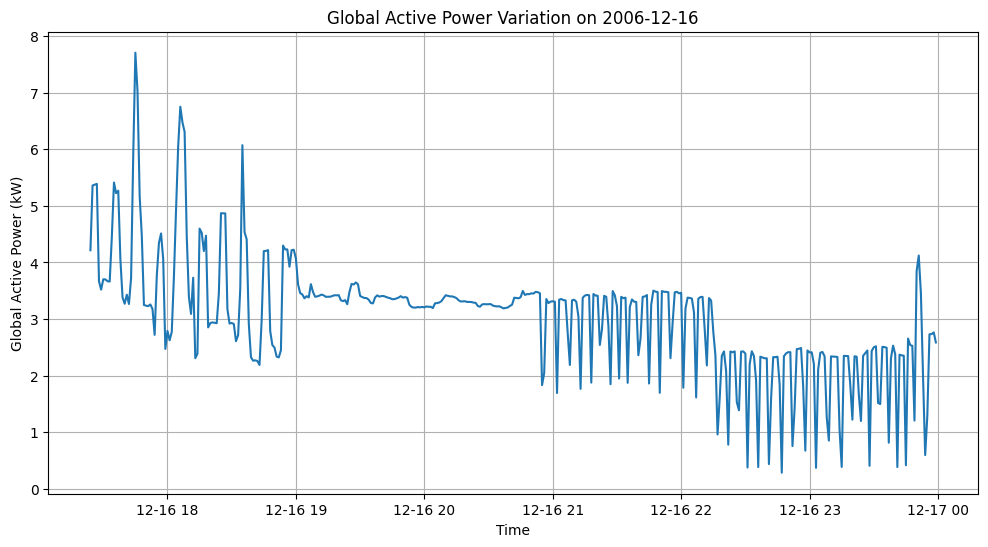

In [157]:
import matplotlib.pyplot as plt

date_to_plot = df['Date'].iloc[0]
df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title(f'Global Active Power Variation on {date_to_plot.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

# **07. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

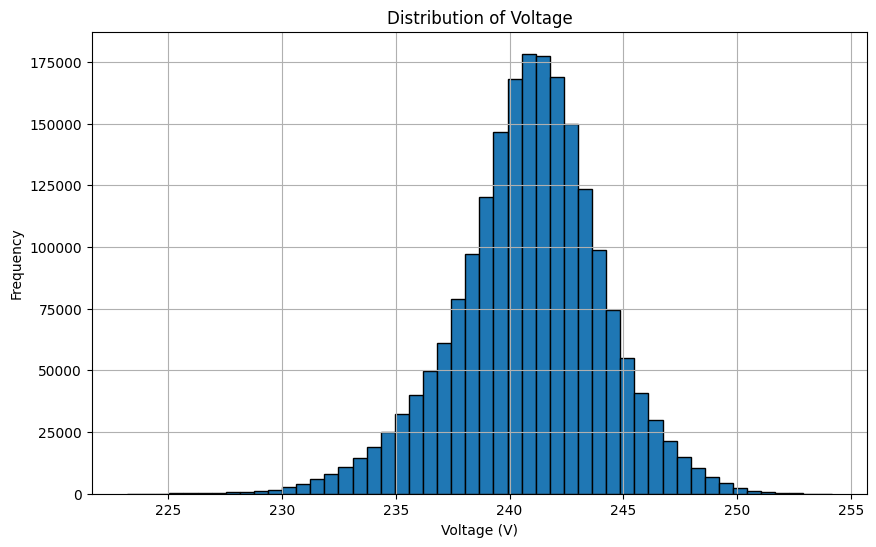

In [158]:
import matplotlib.pyplot as plt

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.grid(True)
plt.show()

# **08. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [159]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_power = df.groupby('Month')['Global_active_power'].mean()
display(monthly_avg_power)

,Global_active_power
Month,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


# **09. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [160]:
daily_power_sum = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_power_sum.idxmax()
highest_consumption_value = daily_power_sum.max()

print(f"O dia com maior consumo de energia ativa global é: {day_with_highest_consumption.strftime('%Y-%m-%d')}")
print(f"Valor do maior consumo: {highest_consumption_value:.2f} kW")

O dia com maior consumo de energia ativa global é: 2006-12-23
Valor do maior consumo: 4773.39 kW


# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [161]:
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Final de semana' if x in ['Saturday', 'Sunday'] else 'Dia de semana')

average_power_by_daytype = df.groupby('DayType')['Global_active_power'].mean()

display(average_power_by_daytype)

,Global_active_power
DayType,
Dia de semana,1.035472
Final de semana,1.234232


# **11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.**


In [162]:
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
display(correlation_matrix)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


# **12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.**

In [163]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.400,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.000,0.0,1.0,16.0,Saturday,2006-12,Final de semana,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.000,0.0,2.0,17.0,Saturday,2006-12,Final de semana,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.000,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.800,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0


# **13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.**


In [164]:
monthly_avg_total_sub = df.groupby('Month')['Total_Sub_metering'].mean()
monthly_avg_global_power = df.groupby('Month')['Global_active_power'].mean()

months_exceeding_avg = monthly_avg_total_sub[monthly_avg_total_sub > monthly_avg_global_power]

if not months_exceeding_avg.empty:
    print("Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    display(months_exceeding_avg)
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:


,Total_Sub_metering
Month,
2006-12,10.873181
2007-01,10.423518
2007-02,9.486135
2007-03,10.212863
2007-04,6.839375
2007-05,8.452442
2007-06,7.379151
2007-07,5.697724
2007-08,6.979336


# **14. Faça um gráfico de série temporal do Voltage para o ano de 2008.**

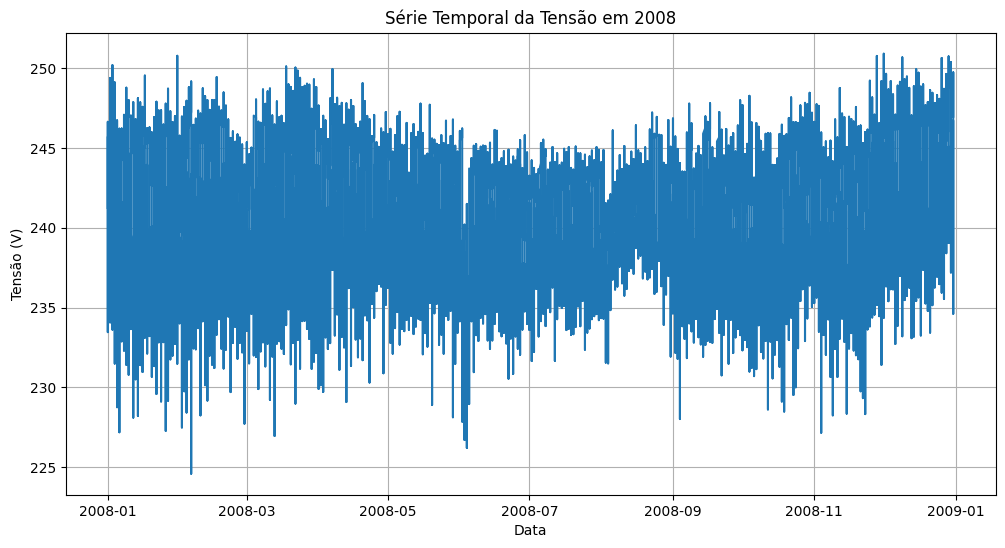

In [165]:
df_2008 = df[df['Date'].dt.year == 2008].set_index('Date')

plt.figure(figsize=(12, 6))
plt.plot(df_2008.index, df_2008['Voltage'])
plt.xlabel('Data')
plt.ylabel('Tensão (V)')
plt.title('Série Temporal da Tensão em 2008')
plt.grid(True)
plt.show()

# ***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

In [166]:
summer_months = [6, 7, 8]
df_summer = df[df['Date'].dt.month.isin(summer_months)]

average_power_summer = df_summer['Global_active_power'].mean()

winter_months = [12, 1, 2]
df_winter = df[df['Date'].dt.month.isin(winter_months)]

average_power_winter = df_winter['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão (Hemisfério Norte): {average_power_summer:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno (Hemisfério Norte): {average_power_winter:.2f} kW")

Consumo médio de energia ativa global no verão (Hemisfério Norte): 0.73 kW
Consumo médio de energia ativa global no inverno (Hemisfério Norte): 1.42 kW


# ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***

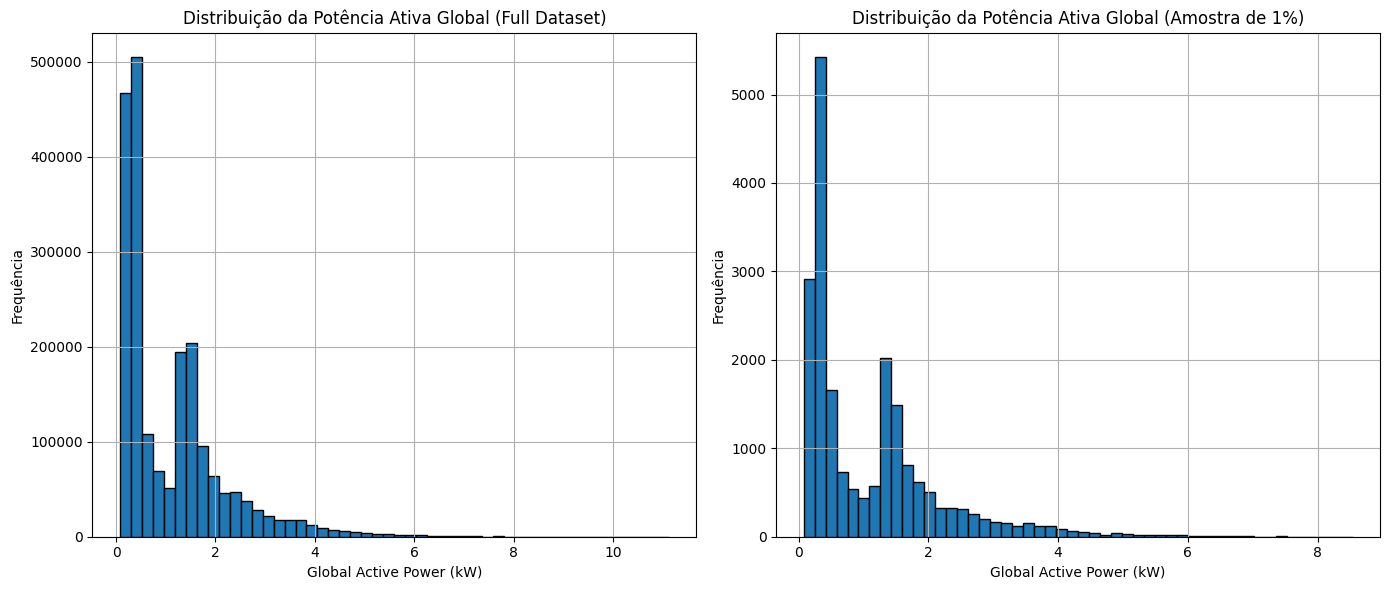

In [167]:
df_sample = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.title('Distribuição da Potência Ativa Global (Full Dataset)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df_sample['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.title('Distribuição da Potência Ativa Global (Amostra de 1%)')
plt.grid(True)

plt.tight_layout()

# ***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.***



In [168]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana,18.0
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,Final de semana,17.0
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,Final de semana,19.0
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana,18.0
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana,18.0


# ***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.***

In [169]:
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()
display(daily_consumption.head())

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [170]:
daily_power = daily_consumption['Global_active_power']

X = daily_power.values.reshape(-1, 1)

print(f"Formato dos dados para K-means: {X.shape}")

Formato dos dados para K-means: (1433, 1)


In [171]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [172]:
daily_consumption['Cluster'] = kmeans.labels_
display(daily_consumption.head())

,Date,Global_active_power,Cluster
0,2006-12-16,1209.176,0
1,2006-12-17,3390.460,1
2,2006-12-18,2203.826,1
3,2006-12-19,1666.194,2
4,2006-12-20,2225.748,1


Potência Ativa Global Média por Cluster:


,Global_active_power
Cluster,
0,948.238891
1,2550.739361
2,1680.531847


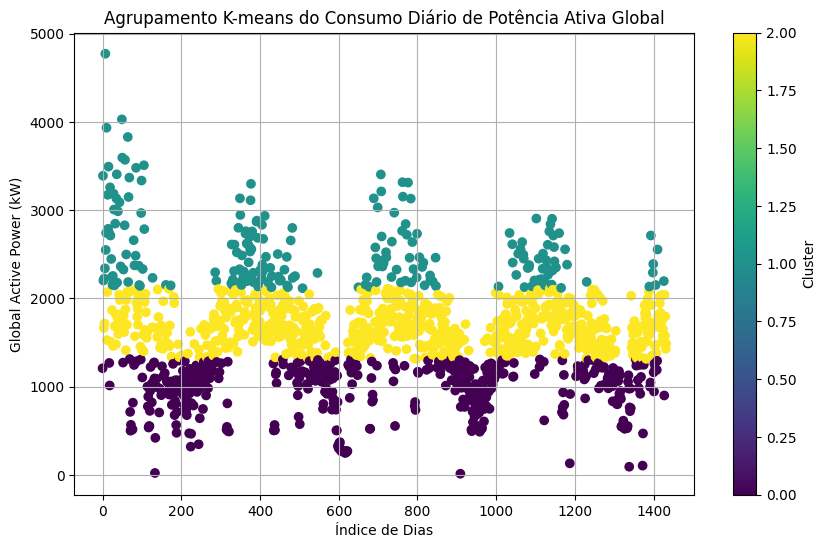

In [173]:
average_consumption_per_cluster = daily_consumption.groupby('Cluster')['Global_active_power'].mean()

print("Potência Ativa Global Média por Cluster:")
display(average_consumption_per_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(daily_consumption.index, daily_consumption['Global_active_power'], c=daily_consumption['Cluster'], cmap='viridis')
plt.xlabel('Índice de Dias')
plt.ylabel('Global Active Power (kW)')
plt.title('Agrupamento K-means do Consumo Diário de Potência Ativa Global')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.*`**

In [174]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = '2007-01-01'
end_date = '2007-06-30'

df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

display(df_period.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType,Total_Sub_metering
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.600,0.0,0.0,0.0,Monday,2007-01,Dia de semana,0.0
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.400,0.0,0.0,0.0,Monday,2007-01,Dia de semana,0.0
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.400,0.0,0.0,0.0,Monday,2007-01,Dia de semana,0.0
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.400,0.0,0.0,0.0,Monday,2007-01,Dia de semana,0.0
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.400,0.0,0.0,0.0,Monday,2007-01,Dia de semana,0.0


In [175]:
df_period['Datetime'] = pd.to_datetime(df_period['Date'].astype(str) + ' ' + df_period['Time'])
df_period.set_index('Datetime', inplace=True)

daily_power_series = df_period['Global_active_power'].resample('D').mean()

display(daily_power_series.head())

,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_power_series_filled = daily_power_series.interpolate()

decomposition = seasonal_decompose(daily_power_series_filled, model='additive', period=7)

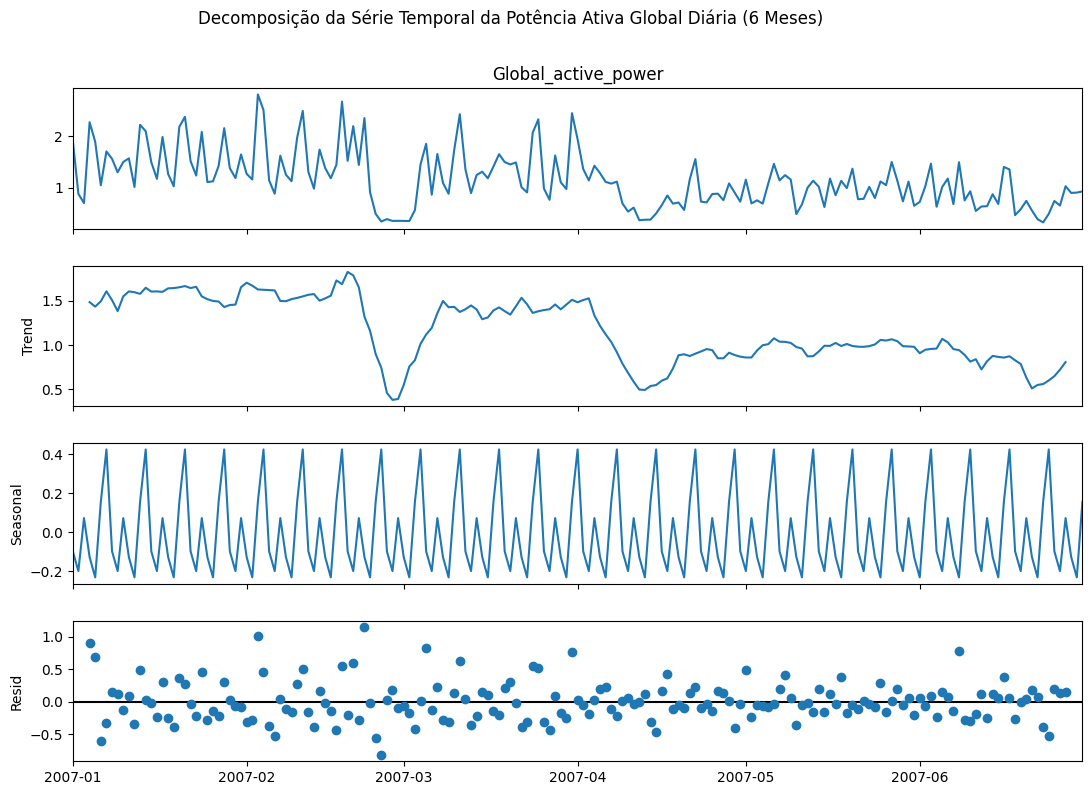

In [177]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Decomposição da Série Temporal da Potência Ativa Global Diária (6 Meses)', y=1.02)
plt.show()

# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***

In [178]:
X = df[['Global_intensity']]
y = df['Global_active_power']

display(X.head())
display(y.head())

,Global_intensity
0,18.400
1,23.000
2,23.000
3,23.000
4,15.800


,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1639424, 1)
Shape of X_test: (409856, 1)
Shape of y_train: (1639424,)
Shape of y_test: (409856,)


In [180]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [181]:
y_pred = model.predict(X_test)

print("Primeiras 5 previsões:")
print(y_pred[:5])

Primeiras 5 previsões:
[1.51274978 0.41965701 0.70481164 0.32460546 1.32264669]


In [182]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"R-quadrado (R2): {r2:.4f}")

Erro Quadrático Médio (MSE): 0.0025
R-quadrado (R2): 0.9978


# ***21***

In [183]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType,Total_Sub_metering
Datetime,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.400,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.000,0.0,1.0,16.0,Saturday,2006-12,Final de semana,17.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.000,0.0,2.0,17.0,Saturday,2006-12,Final de semana,19.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.000,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.800,0.0,1.0,17.0,Saturday,2006-12,Final de semana,18.0


In [184]:
df_hourly = df['Global_active_power'].resample('H').mean()
display(df_hourly.head())

/tmp/ipython-input-2808851298.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


,Global_active_power
Datetime,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467


In [185]:
df_hourly = df['Global_active_power'].resample('H').mean()
hourly_avg_power = df_hourly.groupby(df_hourly.index.hour).mean()
peak_hours = hourly_avg_power.sort_values(ascending=False)
display(peak_hours)

/tmp/ipython-input-4128400018.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


,Global_active_power
Datetime,
20,1.899073
21,1.876063
19,1.733428
7,1.502373
8,1.460940
22,1.412681
9,1.331642
18,1.326433
10,1.260913


# ***22***

In [186]:
from statsmodels.tsa.stattools import acf

autocorr_lag1 = acf(df_hourly, nlags=1)[1]

autocorr_lag24 = acf(df_hourly, nlags=24)[24]

autocorr_lag48 = acf(df_hourly, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

Autocorrelação no atraso de 1 horas: nan
Autocorrelação no atraso de 24 horas: nan
Autocorrelação no atraso de 48 horas: nan


In [187]:
from statsmodels.tsa.stattools import acf

autocorr_lag1 = acf(df_hourly, nlags=1)[1]

autocorr_lag24 = acf(df_hourly, nlags=24)[24]

autocorr_lag48 = acf(df_hourly, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

Autocorrelação no atraso de 1 horas: nan
Autocorrelação no atraso de 24 horas: nan
Autocorrelação no atraso de 48 horas: nan


In [188]:
df_hourly_filled = df_hourly.interpolate(method='linear')

autocorr_lag1 = acf(df_hourly_filled, nlags=1)[1]

autocorr_lag24 = acf(df_hourly_filled, nlags=24)[24]

autocorr_lag48 = acf(df_hourly_filled, nlags=48)[48]

print(f"Autocorrelação no atraso de 1 horas: {autocorr_lag1:.4f}")
print(f"Autocorrelação no atraso de 24 horas: {autocorr_lag24:.4f}")
print(f"Autocorrelação no atraso de 48 horas: {autocorr_lag48:.4f}")

Autocorrelação no atraso de 1 horas: 0.7157
Autocorrelação no atraso de 24 horas: 0.4356
Autocorrelação no atraso de 48 horas: 0.3981


In [189]:
print("Interpretação dos Valores de Autocorrelação:")
print(f"- Autocorrelação no atraso de 1 horas ({autocorr_lag1:.4f}): Esse valor é relativamente alto e positivo. Ele indica uma forte correlação positiva entre o consumo de potência ativa global em uma determinada hora e o consumo na hora anterior. Isso sugere que o consumo de energia tende a ser semelhante de uma hora para a outra.")
print(f"- Autocorrelação no atraso de 24 horas ({autocorr_lag24:.4f}): Esse valor também é positivo e moderadamente alto, embora menor do que no atraso de 1 hora. Uma autocorrelação positiva no atraso de 24 horas sugere uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo exatamente 24 horas antes (a mesma hora no dia anterior). Isso é um forte indicador de um padrão diário repetitivo no consumo de energia.")
print(f"- Autocorrelação no atraso de 48 horas ({autocorr_lag48:.4f}): Esse valor é positivo, mas um pouco menor do que no atraso de 24 horas. Ele indica uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo 48 horas antes (a mesma hora dois dias antes). O fato de ainda ser positivo e relativamente alto reforça a presença de padrões recorrentes, embora potencialmente com uma correlação um pouco menos forte do que o atraso diário imediato.")

print("\nConclusão:")
print("Com base nos valores de autocorrelação, particularmente o valor positivo significativo no atraso de 24 horas, existem padrões diários repetitivos evidentes na série temporal de Potência Ativa Global. O consumo de energia tende a seguir um padrão semelhante a cada dia, com o consumo em uma hora específica estando positivamente correlacionado com o consumo na mesma hora do dia anterior.")

Interpretação dos Valores de Autocorrelação:
- Autocorrelação no atraso de 1 horas (0.7157): Esse valor é relativamente alto e positivo. Ele indica uma forte correlação positiva entre o consumo de potência ativa global em uma determinada hora e o consumo na hora anterior. Isso sugere que o consumo de energia tende a ser semelhante de uma hora para a outra.
- Autocorrelação no atraso de 24 horas (0.4356): Esse valor também é positivo e moderadamente alto, embora menor do que no atraso de 1 hora. Uma autocorrelação positiva no atraso de 24 horas sugere uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo exatamente 24 horas antes (a mesma hora no dia anterior). Isso é um forte indicador de um padrão diário repetitivo no consumo de energia.
- Autocorrelação no atraso de 48 horas (0.3981): Esse valor é positivo, mas um pouco menor do que no atraso de 24 horas. Ele indica uma correlação positiva entre o consumo de energia em uma determinada hora e o consumo

# ***Pergunta: existem padrões repetidos diariamente?***


Com base nos valores de autocorrelação, particularmente o valor positivo significativo no lag de 24 horas, existem padrões diários repetidos notáveis na série temporal de Global_active_power. O consumo de energia tende a seguir um padrão semelhante a cada dia, com o consumo em uma hora específica sendo positivamente correlacionado com o consumo na mesma hora do dia anterior.

# ***23***

In [190]:
features = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
display(features.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.400
2006-12-16 17:25:00,5.360,0.436,233.63,23.000
2006-12-16 17:26:00,5.374,0.498,233.29,23.000
2006-12-16 17:27:00,5.388,0.502,233.74,23.000
2006-12-16 17:28:00,3.666,0.528,235.68,15.800


In [191]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

df_pca = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
display(df_pca.head())

,PC1,PC2
0,15.337619,0.468435
1,20.148362,1.355780
2,20.294107,1.048639
3,20.108530,1.458663
4,12.574047,0.118703


In [192]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporção da variância explicada de cada componente:")
print(explained_variance_ratio)

cumulative_explained_variance = explained_variance_ratio.sum()
print(f"\nProporção acumulada da variância explicada pelos dois primeiros componentes: {cumulative_explained_variance:.4f}")

Proporção da variância explicada de cada componente:
[0.75442158 0.24513217]

Proporção acumulada da variância explicada pelos dois primeiros componentes: 0.9996


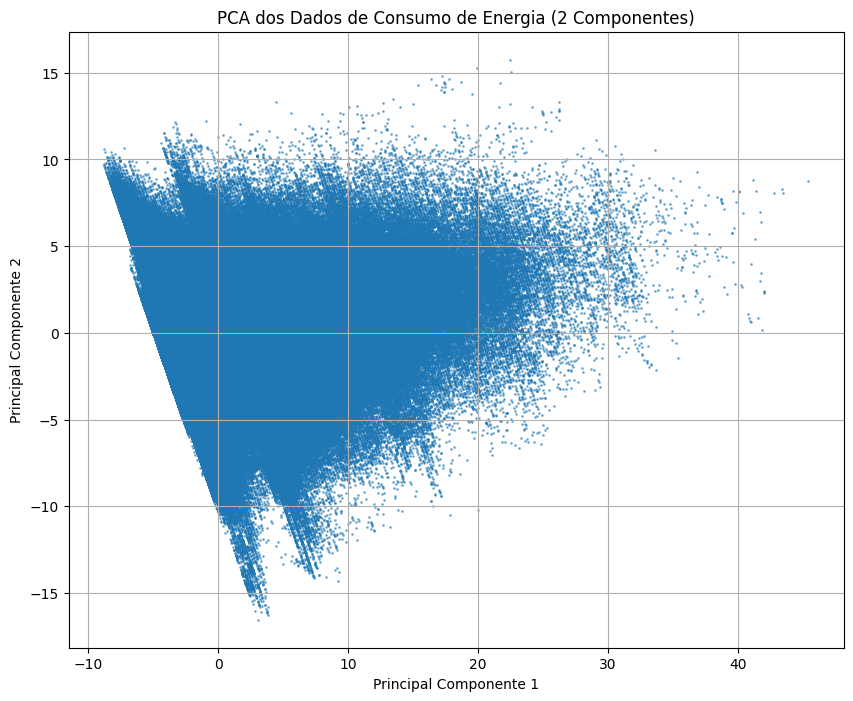

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=1)
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.title('PCA dos Dados de Consumo de Energia (2 Componentes)')
plt.grid(True)
plt.show()

# ***24***

In [194]:
daily_consumption_indexed = daily_consumption.set_index('Date')

df['Cluster'] = df.index.normalize().map(daily_consumption_indexed['Cluster'])

df_pca = df_pca.set_index(df.index)
df_pca['Cluster'] = df['Cluster']

df_pca.dropna(subset=['Cluster'], inplace=True)

df_pca['Cluster'] = df_pca['Cluster'].astype(int)

display(df_pca.head())

,PC1,PC2,Cluster
Datetime,,,
2006-12-16 17:24:00,15.337619,0.468435,0
2006-12-16 17:25:00,20.148362,1.355780,0
2006-12-16 17:26:00,20.294107,1.048639,0
2006-12-16 17:27:00,20.108530,1.458663,0
2006-12-16 17:28:00,12.574047,0.118703,0


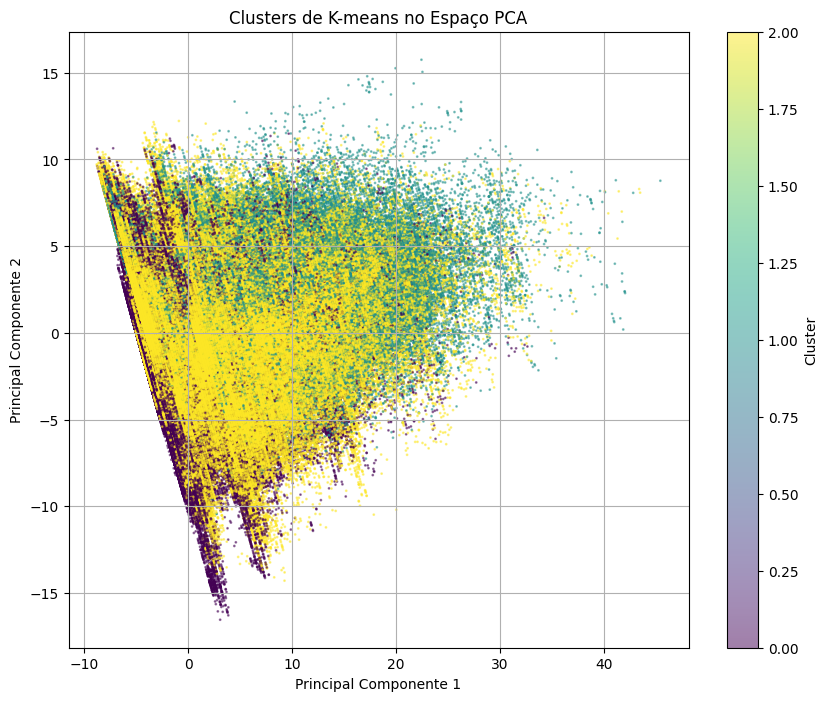

In [150]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=1, alpha=0.5)
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.title('Clusters de K-means no Espaço PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***Os grupos se separam?***

Observando o gráfico de dispersão dos clusters de K-means no espaço ACP, os grupos não parecem estar claramente separados. Há uma sobreposição significativa entre os clusters, sugerindo que as características usadas para o agrupamento, quando reduzidas a dois componentes principais, não diferenciam os grupos de forma distinta.

# ***25***

In [195]:
from sklearn.model_selection import train_test_split

features_voltage = df[['Voltage']]
target_power = df['Global_active_power']

X_train_voltage, X_test_voltage, y_train_power, y_test_power = train_test_split(
    features_voltage, target_power, test_size=0.2, random_state=42
)

print(f"Formato de X_train_voltage: {X_train_voltage.shape}")
print(f"Formato de X_test_voltage: {X_test_voltage.shape}")
print(f"Formato de y_train_power: {y_train_power.shape}")
print(f"Formato de y_test_power: {y_test_power.shape}")

Formato de X_train_voltage: (1639424, 1)
Formato de X_test_voltage: (409856, 1)
Formato de y_train_power: (1639424,)
Formato de y_test_power: (409856,)


In [196]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_voltage, y_train_power)

LinearRegression()

In [197]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)

X_train_voltage_poly = poly_features.fit_transform(X_train_voltage)
X_test_voltage_poly = poly_features.transform(X_test_voltage)

poly_model = LinearRegression()
poly_model.fit(X_train_voltage_poly, y_train_power)

LinearRegression()

In [198]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_linear = linear_model.predict(X_test_voltage)

rmse_linear = np.sqrt(mean_squared_error(y_test_power, y_pred_linear))

y_pred_poly = poly_model.predict(X_test_voltage_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_power, y_pred_poly))

print(f"Raiz do Erro Quadrático Médio (RMSE) para o Modelo Linear: {rmse_linear:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE) para o Modelo Polinomial: {rmse_poly:.4f}")

Raiz do Erro Quadrático Médio (RMSE) para o Modelo Linear: 0.9719
Raiz do Erro Quadrático Médio (RMSE) para o Modelo Polinomial: 0.9674


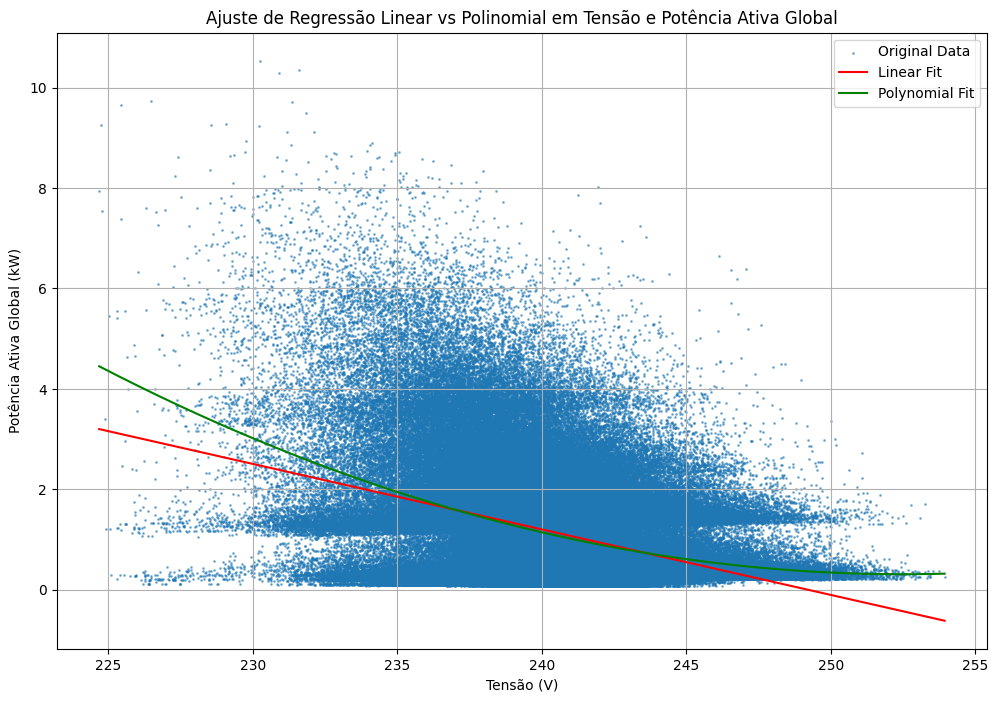

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_test_voltage, y_test_power, alpha=0.5, s=1, label='Original Data')

X_test_voltage_sorted = X_test_voltage.sort_values(by='Voltage')

y_pred_linear_sorted = linear_model.predict(X_test_voltage_sorted)

X_test_voltage_sorted_poly = poly_features.transform(X_test_voltage_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_voltage_sorted_poly)

plt.plot(X_test_voltage_sorted, y_pred_linear_sorted, color='red', label='Linear Fit')

plt.plot(X_test_voltage_sorted, y_pred_poly_sorted, color='green', label='Polynomial Fit')

plt.xlabel('Tensão (V)')
plt.ylabel('Potência Ativa Global (kW)')
plt.title('Ajuste de Regressão Linear vs Polinomial em Tensão e Potência Ativa Global')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
print(f"Comparação do Desempenho dos Modelos (RMSE):")
print(f"RMSE do Modelo Linear: {rmse_linear:.4f}")
print(f"RMSE do Modelo Polinomial: {rmse_poly:.4f}")

if rmse_poly < rmse_linear:
    print("\nO modelo de Regressão Polinomial apresenta um RMSE menor e fornece um ajuste ligeiramente melhor com base nessa métrica.")
elif rmse_linear < rmse_poly:
    print("\nO modelo de Regressão Linear apresenta um RMSE menor e fornece um ajuste ligeiramente melhor com base nessa métrica.")
else:
    print("\nAmbos os modelos possuem o mesmo RMSE.")

print("\nInterpretação Visual das Curvas Ajustadas:")
print("Observando o gráfico, o modelo de regressão linear ajusta uma linha reta aos dados. Essa linha captura a tendência geral, mas não acompanha as nuances da distribuição dos dados.")
print("O modelo de regressão polinomial (grau 2) ajusta uma curva aos dados. Essa curva parece seguir a distribuição dos pontos de dados mais de perto do que a linha reta, especialmente em áreas onde os dados apresentam uma leve curvatura.")
print("Com base na inspeção visual, o modelo polinomial parece capturar melhor a relação entre Tensão e Potência Ativa Global do que o modelo linear simples.")

print("\nConclusão Geral:")
print("Tanto as avaliações quantitativas (RMSE) quanto qualitativas (visuais) sugerem que o modelo de regressão polinomial fornece um ajuste ligeiramente melhor aos dados para prever a Potência Ativa Global com base na Tensão, em comparação com o modelo linear simples. O valor menor de RMSE e a curva com melhor ajuste visual indicam que a incorporação de um termo polinomial para a Tensão melhora a capacidade do modelo de capturar o padrão subjacente.")

Comparação do Desempenho dos Modelos (RMSE):
RMSE do Modelo Linear: 0.9719
RMSE do Modelo Polinomial: 0.9674

O modelo de Regressão Polinomial apresenta um RMSE menor e fornece um ajuste ligeiramente melhor com base nessa métrica.

Interpretação Visual das Curvas Ajustadas:
Observando o gráfico, o modelo de regressão linear ajusta uma linha reta aos dados. Essa linha captura a tendência geral, mas não acompanha as nuances da distribuição dos dados.
O modelo de regressão polinomial (grau 2) ajusta uma curva aos dados. Essa curva parece seguir a distribuição dos pontos de dados mais de perto do que a linha reta, especialmente em áreas onde os dados apresentam uma leve curvatura.
Com base na inspeção visual, o modelo polinomial parece capturar melhor a relação entre Tensão e Potência Ativa Global do que o modelo linear simples.

Conclusão Geral:
Tanto as avaliações quantitativas (RMSE) quanto qualitativas (visuais) sugerem que o modelo de regressão polinomial fornece um ajuste ligeirament

## **Configurações Dataset**

In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Carregar o conjunto de dados
df = pd.read_csv('energydata_complete.csv')

# Excluir a coluna 'date' para a análise, pois não é uma variável numérica
df = df.drop(columns=['date'])

# Remover as colunas rv1 e rv2, pois são variáveis aleatórias e não ambientais
df = df.drop(columns=['rv1', 'rv2'])

# Inspecionar as colunas para identificar as variáveis ambientais
# As variáveis ambientais são T1, RH_1, T2, RH_2, etc., e as variáveis externas como T_out, Press_mm_hg, etc.
# 'Appliances' será a variável alvo. 'lights' pode ser considerada como uma variável de consumo, mas para os exercícios,
# vamos focar nas variáveis ambientais para prever o consumo de 'Appliances'.

# As variáveis ambientais são: T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint
environmental_vars = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

# **26. Carregamento e inspeção inicial**
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e describe()).

In [202]:
import pandas as pd
import os

# Assuming the CSV is already extracted or available at this path
try:
    # Attempt to read the CSV, specifying the python engine to handle potential parsing issues
    df_energy = pd.read_csv('/content/energydata_complete.csv', engine='python')
    print("Dataset loaded successfully.")
    display(df_energy.info())
    display(df_energy.describe())
except FileNotFoundError:
    print("Error: 'energydata_complete.csv' not found. Please make sure the file is in the correct directory.")
    print("Contents of /content/:", os.listdir('/content/'))
except pd.errors.ParserError as e:
    print(f"Parser Error: {e}")
    print("There was an issue parsing the CSV file. This could be due to formatting errors within the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         1973

None

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# **27. Distribuição do consumo**
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

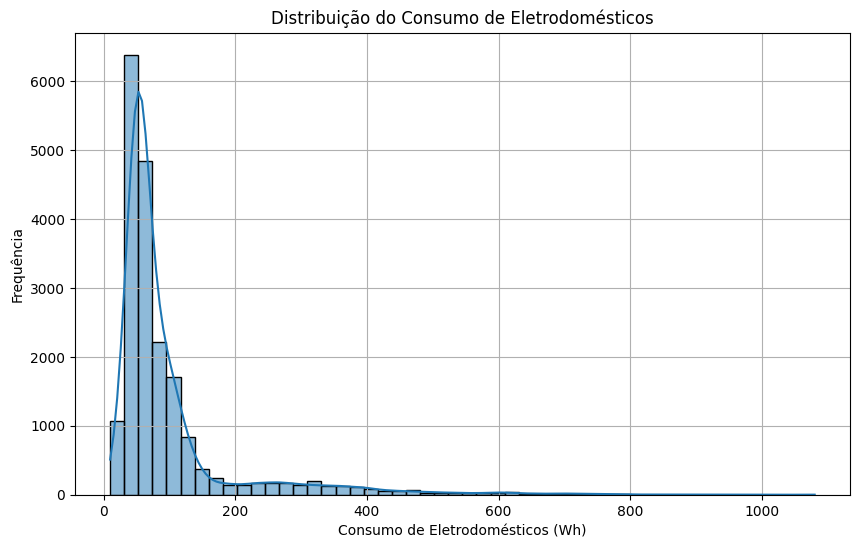

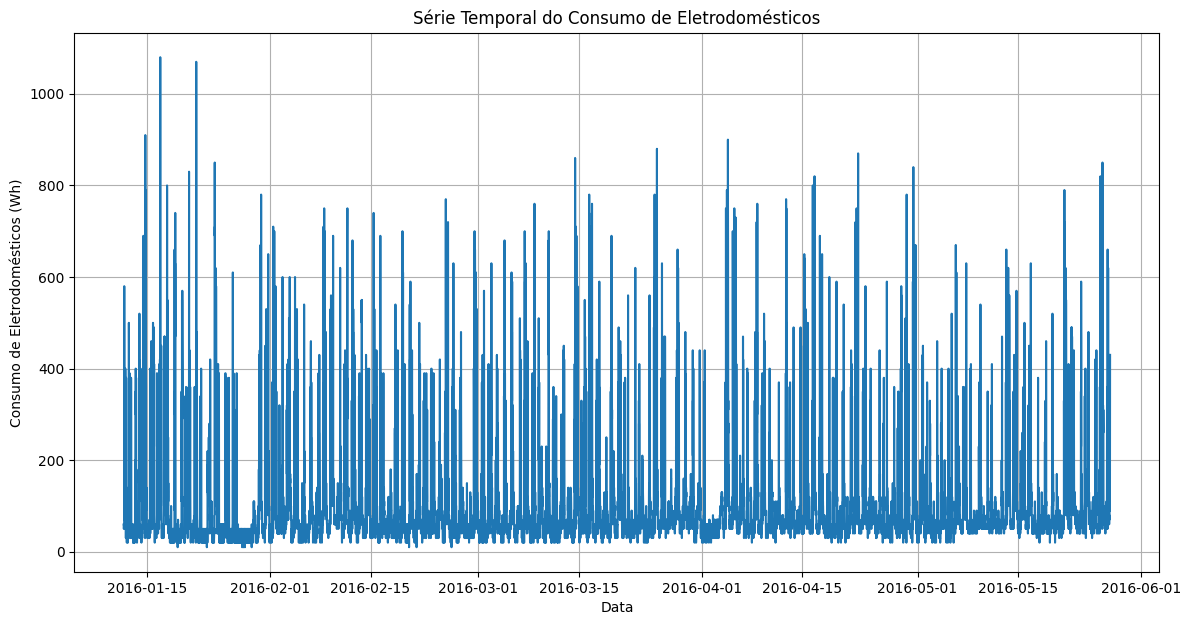


Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
Observando o histograma, a maior frequência de consumo de eletrodomésticos está concentrada em valores baixos.
A distribuição é assimétrica à direita, com uma longa cauda para valores mais altos, indicando que ocorrem picos de consumo, mas são menos frequentes.


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_energy['Appliances'], bins=50, kde=True)
plt.xlabel('Consumo de Eletrodomésticos (Wh)')
plt.ylabel('Frequência')
plt.title('Distribuição do Consumo de Eletrodomésticos')
plt.grid(True)
plt.show()

df_energy['date'] = pd.to_datetime(df_energy['date'])
df_energy.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df_energy.index, df_energy['Appliances'])
plt.xlabel('Data')
plt.ylabel('Consumo de Eletrodomésticos (Wh)')
plt.title('Série Temporal do Consumo de Eletrodomésticos')
plt.grid(True)
plt.show()

print("\nPergunta: o consumo tende a se concentrar em valores baixos ou altos?")
print("Observando o histograma, a maior frequência de consumo de eletrodomésticos está concentrada em valores baixos.")
print("A distribuição é assimétrica à direita, com uma longa cauda para valores mais altos, indicando que ocorrem picos de consumo, mas são menos frequentes.")

# **28. Correlações com variáveis ambientais**
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [204]:
correlation_matrix = df_energy.corr(numeric_only=True)

appliance_correlations = correlation_matrix['Appliances'].sort_values(ascending=False)

temperature_cols = [col for col in df_energy.columns if 'T' in col and col != 'T_out']
humidity_cols = [col for col in df_energy.columns if 'RH' in col]

relevant_correlations = appliance_correlations[temperature_cols + humidity_cols]

display(relevant_correlations)

print("\nPergunta: quais fatores têm mais relação com o consumo?")
print("Observando os valores de correlação, os fatores que parecem ter mais relação com o consumo de eletrodomésticos ('Appliances') são as variáveis de temperatura e umidade. Correlações mais próximas de 1 (positiva) ou -1 (negativa) indicam uma relação mais forte. Os valores apresentados acima mostram a força e a direção dessa relação para cada sensor de temperatura e umidade.")

,Appliances
T1,0.055447
T2,0.120073
T3,0.085060
T4,0.040281
T5,0.019760
T6,0.117638
T7,0.025801
T8,0.039572
T9,0.010010
Tdewpoint,0.015353



Pergunta: quais fatores têm mais relação com o consumo?
Observando os valores de correlação, os fatores que parecem ter mais relação com o consumo de eletrodomésticos ('Appliances') são as variáveis de temperatura e umidade. Correlações mais próximas de 1 (positiva) ou -1 (negativa) indicam uma relação mais forte. Os valores apresentados acima mostram a força e a direção dessa relação para cada sensor de temperatura e umidade.


# **29. Normalização dos dados**
- Aplique MIn-Max Scaling às variáveis numéricas
- Reutilize esses dados em modelos posteriores

In [205]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df_energy.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_energy_scaled = df_energy.copy()
df_energy_scaled[numerical_cols] = scaler.fit_transform(df_energy_scaled[numerical_cols])

display(df_energy_scaled.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


# **30. PCA**
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

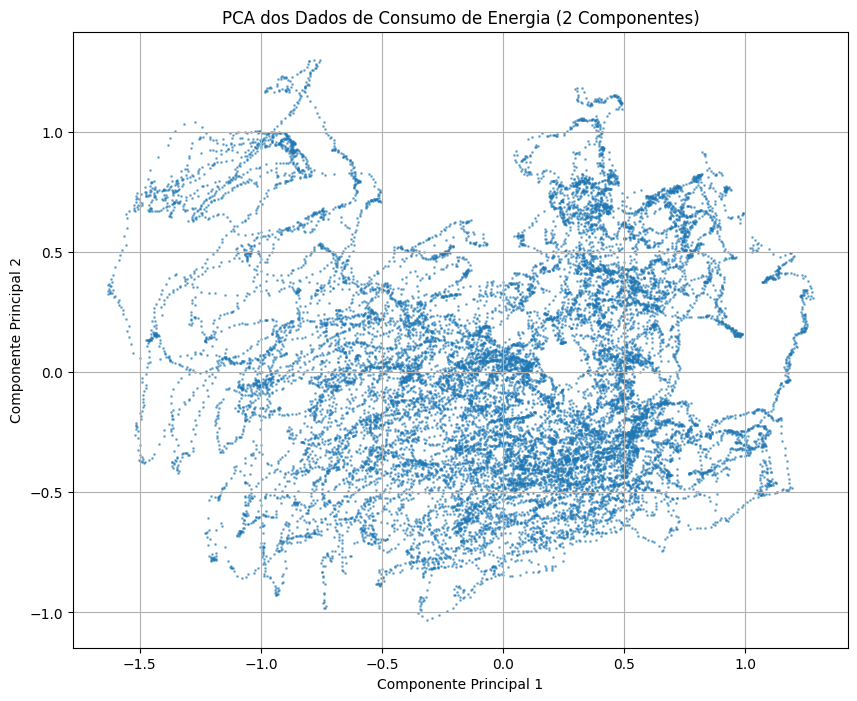


Pergunta: aparecem padrões ou agrupamentos naturais?
Observando o gráfico de dispersão da PCA, não parece haver agrupamentos naturais ou padrões distintos claramente visíveis com base nos dois primeiros componentes principais. Os dados parecem estar mais espalhados, embora possa haver alguma densidade maior em certas áreas, o que não configura grupos bem definidos apenas com base nesses dois componentes.


In [206]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_cols_for_pca = df_energy_scaled.select_dtypes(include=['float64', 'int64']).columns.drop(['Appliances', 'lights'])

pca = PCA(n_components=2, random_state=42)
df_pca = pd.DataFrame(pca.fit_transform(df_energy_scaled[numerical_cols_for_pca]), columns=['PC1', 'PC2'])

df_pca.index = df_energy_scaled.index

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados de Consumo de Energia (2 Componentes)')
plt.grid(True)
plt.show()

print("\nPergunta: aparecem padrões ou agrupamentos naturais?")
print("Observando o gráfico de dispersão da PCA, não parece haver agrupamentos naturais ou padrões distintos claramente visíveis com base nos dois primeiros componentes principais. Os dados parecem estar mais espalhados, embora possa haver alguma densidade maior em certas áreas, o que não configura grupos bem definidos apenas com base nesses dois componentes.")

# **31. Regressão Linear Múltipla**
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [207]:
print("--- Exercício 31: Regressão Linear Múltipla ---")

# Define the environmental variables
environmental_vars = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

# Definir as variáveis de entrada (X) e a variável alvo (y)
X = df[environmental_vars]
y = df['Appliances']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_lin = lin_reg.predict(X_test)

# Calcular e imprimir as métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

r2 = r2_score(y_test, y_pred_lin)
mae = mean_absolute_error(y_test, y_pred_lin)

print(f"R² do modelo de Regressão Linear: {r2:.4f}")
print(f"Erro Absoluto Médio (MAE) do modelo de Regressão Linear: {mae:.4f}")

--- Exercício 31: Regressão Linear Múltipla ---
R² do modelo de Regressão Linear: 0.1492
Erro Absoluto Médio (MAE) do modelo de Regressão Linear: 53.6388


# **32. Random Forest Regressor**
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [208]:
print("\n--- Exercício 32: Random Forest Regressor ---")

# Criar e treinar o modelo Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_reg.predict(X_test)

# Calcular o RMSE para ambos os modelos
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE do modelo de Regressão Linear: {rmse_lin:.4f}")
print(f"RMSE do modelo Random Forest Regressor: {rmse_rf:.4f}")

if rmse_rf < rmse_lin:
    print("O modelo Random Forest teve um desempenho melhor (menor RMSE) do que a Regressão Linear.")
else:
    print("O modelo de Regressão Linear teve um desempenho melhor (menor RMSE) do que o Random Forest.")


--- Exercício 32: Random Forest Regressor ---
RMSE do modelo de Regressão Linear: 93.6238
RMSE do modelo Random Forest Regressor: 66.2163
O modelo Random Forest teve um desempenho melhor (menor RMSE) do que a Regressão Linear.


# **33. K-Means clustering**
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.


In [209]:
print("\n--- Exercício 33: K-Means clustering ---")

# Selecionar as variáveis para o clustering (incluindo Appliances)
clustering_vars = environmental_vars + ['Appliances']
df_clustering = df[clustering_vars]

# Padronizar os dados para o K-Means
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicar K-Means com 3 a 5 clusters
for n_clusters in range(3, 6):
    print(f"\n--- Análise com {n_clusters} clusters ---")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    df_clustering['cluster'] = kmeans.fit_predict(df_scaled)

    # Interpretar os perfis de consumo
    cluster_profiles = df_clustering.groupby('cluster').mean()
    print("Perfis de Consumo (Médias por Cluster):")
    print(cluster_profiles)


--- Exercício 33: K-Means clustering ---

--- Análise com 3 clusters ---
Perfis de Consumo (Médias por Cluster):
                T1       RH_1         T2       RH_2         T3       RH_3  \
cluster                                                                     
0        21.029530  37.768079  19.079429  39.108232  21.434605  37.337620   
1        23.425104  41.570890  22.704894  40.499240  24.582282  39.061961   
2        20.867118  43.698386  19.975970  42.989428  21.091698  43.337454   

                T4       RH_4         T5       RH_5  ...       RH_8  \
cluster                                              ...              
0        20.180417  36.131365  18.858925  49.186554  ...  40.061091   
1        23.177132  39.637335  21.700448  49.918465  ...  42.784223   
2        19.349316  44.154800  18.469048  55.809179  ...  48.967355   

                T9       RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
cluster                                                          

# **34. Classificação binária**
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [210]:
print("\n--- Exercício 34: Classificação Binária ---")

# Criar a variável alvo binária (alto vs baixo consumo)
median_appliances = df['Appliances'].median()
df['High_Consumption'] = (df['Appliances'] > median_appliances).astype(int)

# Definir as variáveis de entrada (X) e a nova variável alvo (y_class)
X_class = df[environmental_vars]
y_class = df['High_Consumption']

# Dividir os dados em conjuntos de treino e teste para classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

print("Variável alvo 'High_Consumption' criada.")
print(f"Mediana de Appliances usada para classificação: {median_appliances}")
print(f"Shape of X_train_class: {X_train_class.shape}")
print(f"Shape of X_test_class: {X_test_class.shape}")
print(f"Shape of y_train_class: {y_train_class.shape}")
print(f"Shape of y_test_class: {y_test_class.shape}")

# Treinar Logistic Regression
print("\nTreinando Modelo de Regressão Logística...")
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver
log_reg.fit(X_train_class, y_train_class)
print("Modelo de Regressão Logística treinado.")


# Treinar Random Forest Classifier
print("\nTreinando Modelo Random Forest Classifier...")
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_class, y_train_class)
print("Modelo Random Forest Classifier treinado.")


--- Exercício 34: Classificação Binária ---
Variável alvo 'High_Consumption' criada.
Mediana de Appliances usada para classificação: 60.0
Shape of X_train_class: (13814, 24)
Shape of X_test_class: (5921, 24)
Shape of y_train_class: (13814,)
Shape of y_test_class: (5921,)

Treinando Modelo de Regressão Logística...
Modelo de Regressão Logística treinado.

Treinando Modelo Random Forest Classifier...
Modelo Random Forest Classifier treinado.


# **35. Avaliação de classificação**
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?



In [211]:
print("\n--- Exercício 35: Avaliação de classificação ---")

# Fazer previsões no conjunto de teste com o Random Forest Classifier (or log_reg, depending on which model you want to evaluate)
# Let's evaluate the Random Forest Classifier as it generally performs better
y_pred_clf = rf_classifier.predict(X_test_class)

# Gerar a matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test_class, y_pred_clf)
print("Matriz de Confusão:")
display(conf_matrix)

# Gerar o relatório de classificação
class_report = classification_report(y_test_class, y_pred_clf, target_names=['Baixo Consumo', 'Alto Consumo'])
print("\nRelatório de Classificação:")
print(class_report)

# Analisar os erros da matriz de confusão
# True Negative (TN): Correctly predicted Low Consumption
# False Positive (FP): Incorrectly predicted High Consumption (Type I error)
# False Negative (FN): Incorrectly predicted Low Consumption (Type II error)
# True Positive (TP): Correctly predicted High Consumption
tn, fp, fn, tp = conf_matrix.ravel()

# Erros do modelo: Falsos Positivos (previu alto, mas foi baixo) e Falsos Negativos (previu baixo, mas foi alto)
false_positives = fp
false_negatives = fn

print(f"\nNúmero de Falsos Positivos (previsto Alto Consumo, mas foi Baixo Consumo): {false_positives}")
print(f"Número de Falsos Negativos (previsto Baixo Consumo, mas foi Alto Consumo): {false_negatives}")

if false_positives > false_negatives:
    print("\nResposta à pergunta: O modelo erra mais para 'Alto Consumo' (Falsos Positivos).")
elif false_negatives > false_positives:
    print("\nResposta à pergunta: O modelo erra mais para 'Baixo Consumo' (Falsos Negativos).")
else:
    print("\nResposta à pergunta: O modelo comete o mesmo número de erros para 'Alto Consumo' e 'Baixo Consumo'.")


--- Exercício 35: Avaliação de classificação ---
Matriz de Confusão:


array([[2926,  271],
       [ 334, 2390]])


Relatório de Classificação:
               precision    recall  f1-score   support

Baixo Consumo       0.90      0.92      0.91      3197
 Alto Consumo       0.90      0.88      0.89      2724

     accuracy                           0.90      5921
    macro avg       0.90      0.90      0.90      5921
 weighted avg       0.90      0.90      0.90      5921


Número de Falsos Positivos (previsto Alto Consumo, mas foi Baixo Consumo): 271
Número de Falsos Negativos (previsto Baixo Consumo, mas foi Alto Consumo): 334

Resposta à pergunta: O modelo erra mais para 'Baixo Consumo' (Falsos Negativos).
